In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
df = pd.read_csv('Data penyakit asthma.csv')
df.info()
df.dropna(how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13089 entries, 0 to 13088
Data columns (total 6 columns):
Year            13089 non-null int64
Location        13089 non-null object
Topic           13089 non-null object
DataValue       13089 non-null float64
DataValueAlt    13089 non-null float64
LocationID      13089 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 613.7+ KB


In [2]:
subdivs = df['Year'].unique()
num_of_subdivs = subdivs.size
print('Total # of DataValue: ' + str(num_of_subdivs))
subdivs

Total # of DataValue: 6


array([2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

Year
2010    624.992450
2013    199.998163
2015     42.344303
2014     40.600000
2011     39.918014
2012     37.037773
Name: DataValue, dtype: float64
Year
2010    624.992450
2013    199.998163
2015     42.344303
2014     40.600000
2011     39.918014
2012     37.037773
Name: DataValue, dtype: float64


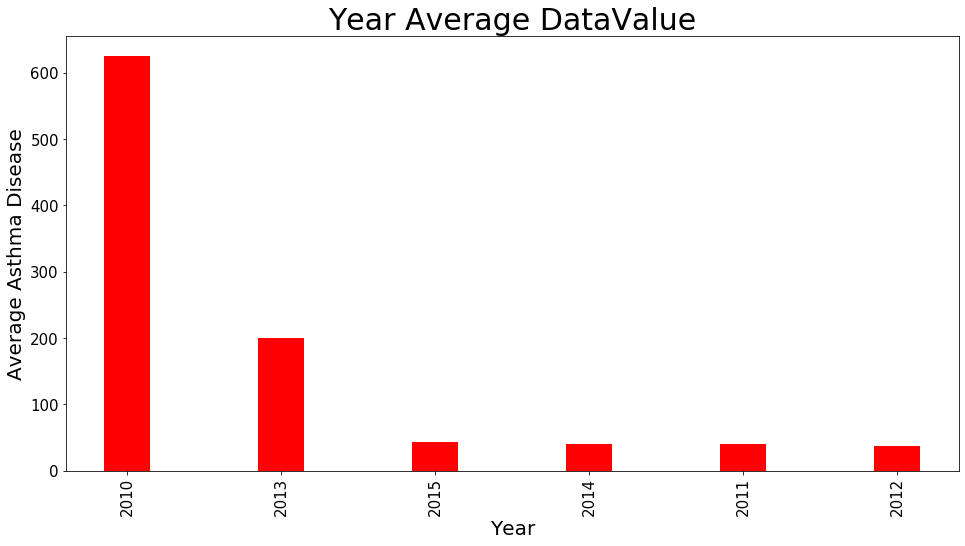

In [6]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df.groupby('Year').mean().sort_values(by='DataValue', ascending=False)['DataValue'].plot(kind="bar", color='r',width=0.3,title='Year Average DataValue', fontsize=15)
plt.xticks(rotation = 90)
plt.ylabel('Average Asthma Disease')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(df.groupby('Year').mean().sort_values(by='DataValue', ascending=False)['DataValue'] )
print(df.groupby('Year').mean().sort_values(by='DataValue', ascending=False)['DataValue'])


Max: 627492.4199999993 ocurred in [2010]
Max: 16963.299999999996 ocurred in [2012]
Mean: 263136.1699999991


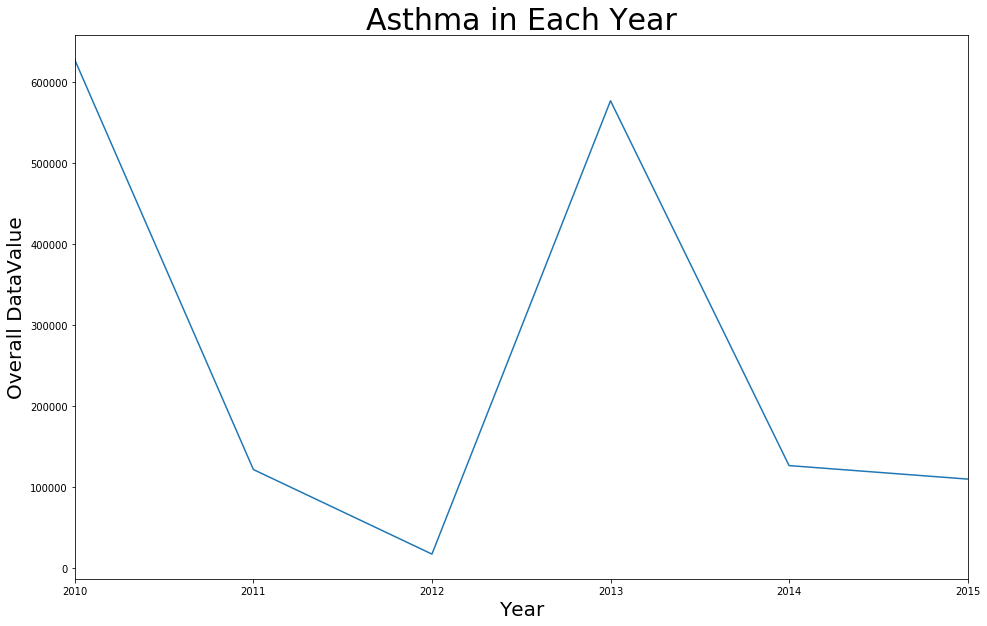

In [7]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df.groupby('Year').sum()['DataValue']
dfg.plot(kind='line', title='Asthma in Each Year', fontsize=10)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall DataValue')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))